In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
ds = pd.read_csv("/content/drive/MyDrive/datasets/Project 1/housing.csv", header=None, sep='\s+')

In [5]:
ds.columns = column_names
ds.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9


In [6]:
ds.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
ds.shape

(506, 14)

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ds, test_size=0.3, random_state=42)

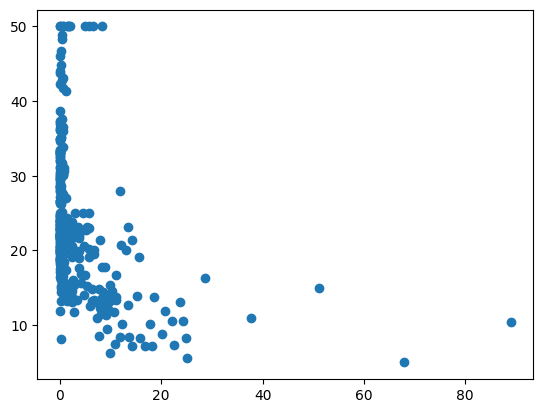

In [10]:
plt.scatter(x='CRIM', y='MEDV', data=train)

In [11]:
train.query('CRIM > 80')
#380

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.9,17.21,10.4


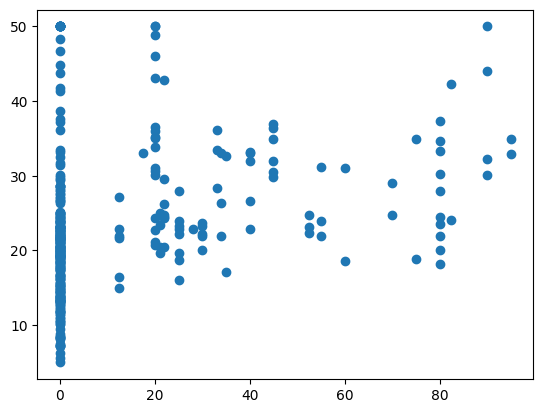

In [12]:
plt.scatter(x='ZN', y='MEDV', data=train)

In [13]:
train.query('ZN > 80 & MEDV > 40')
#202, 283, 256

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
202,0.02177,82.5,2.03,0,0.415,7.610,15.7,6.2700,2,348.0,14.7,395.38,3.11,42.3
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244.0,15.9,386.34,3.11,44.0


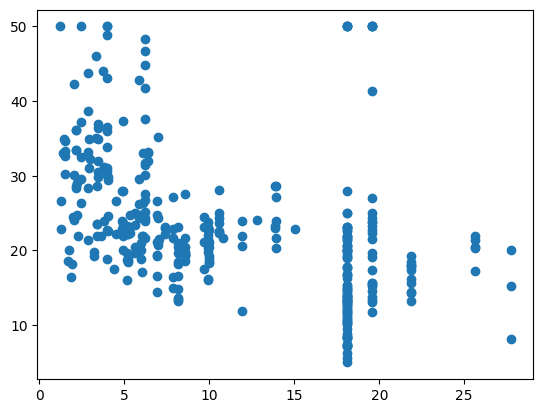

In [14]:
plt.scatter(x='INDUS', y='MEDV', data = train)

In [15]:
train.query('INDUS > 19 & MEDV > 40')
#157 163 162 161 166

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0


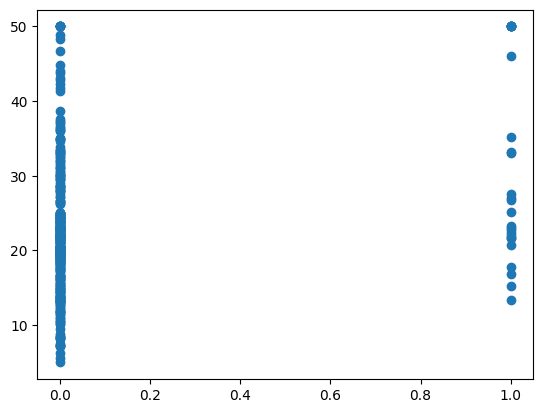

In [16]:
plt.scatter(x='CHAS', y='MEDV', data=train)

In [17]:
train.query('CHAS == 1 & MEDV > 40')
#282 369 283

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
369,5.66998,0.0,18.10,1,0.6310,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0
282,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216.0,14.9,377.07,3.01,46.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
372,8.26725,0.0,18.10,1,0.6680,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0


In [18]:
stats.zscore(train['CHAS']).unique()

array([-0.28154625,  3.55181427])

In [19]:
stats.zscore(train['CHAS']).sort_values().tail(10)

,CHAS
273,3.551814
222,3.551814
152,3.551814
363,3.551814
369,3.551814
220,3.551814
277,3.551814
356,3.551814
276,3.551814
283,3.551814


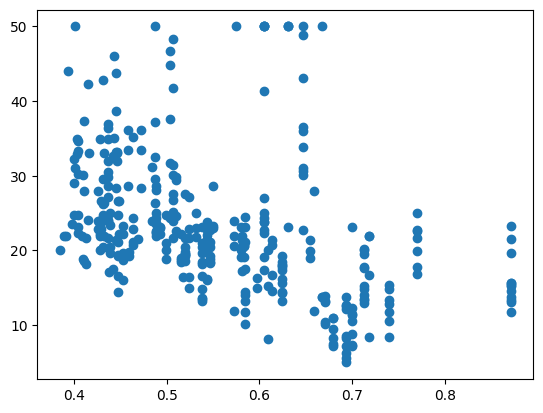

In [20]:
plt.scatter(x='NOX', y='MEDV', data=train)

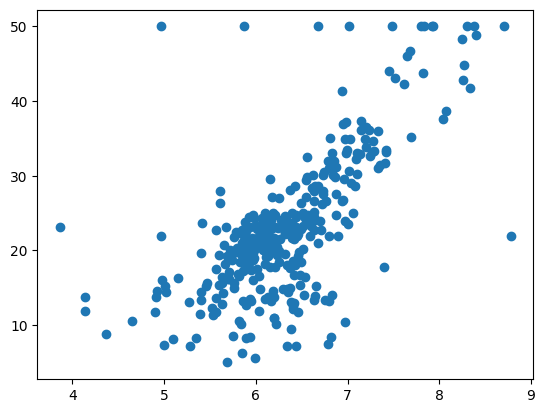

In [21]:
plt.scatter(x='RM', y='MEDV', data=train)

In [22]:
train.query('RM > 8 & MEDV < 30')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
364,3.47428,0.0,18.1,1,0.718,8.78,82.9,1.9047,24,666.0,20.2,354.55,5.29,21.9


In [23]:
train.query('RM < 6 & MEDV == 50')
#368 372 364

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0


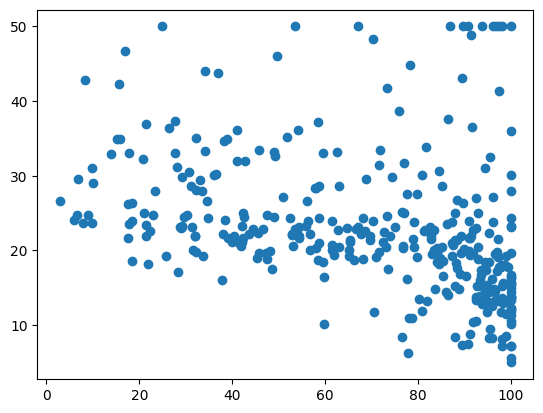

In [24]:
plt.scatter(x='AGE', y='MEDV', data=train)

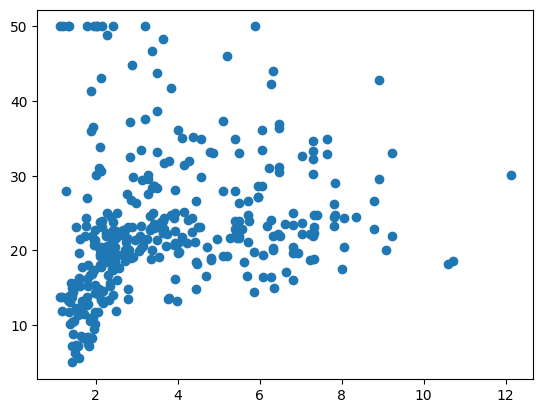

In [25]:
plt.scatter(x='DIS', y='MEDV', data=train)

In [26]:
train.query('DIS > 12')
#353

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
353,0.01709,90.0,2.02,0,0.41,6.728,36.1,12.1265,5,187.0,17.0,384.46,4.5,30.1


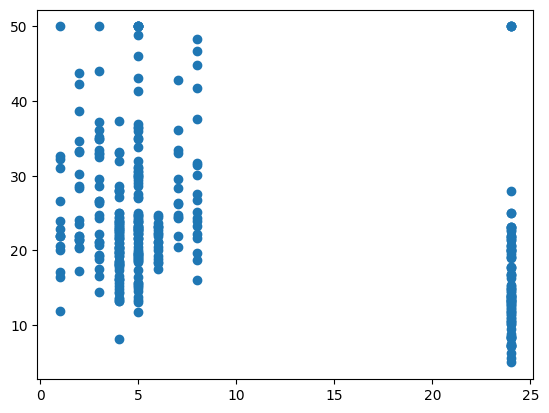

In [27]:
plt.scatter(x='RAD', y='MEDV', data=train)

In [28]:
train.query('RAD > 20 & MEDV > 40')
#369 368 370 372

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0


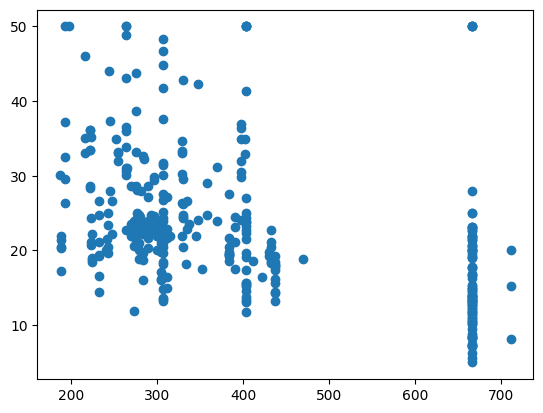

In [29]:
plt.scatter(x='TAX', y='MEDV', data=train)

In [30]:
train.query('TAX > 600 & MEDV == 50')
#369 368 370 372

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0


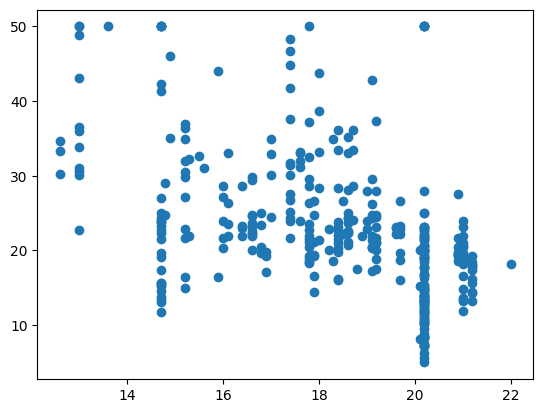

In [31]:
plt.scatter(x='PTRATIO', y='MEDV', data=train)

In [32]:
train.query('PTRATIO > 20 & MEDV == 50')
#369 368 370 372

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0


In [33]:
ds = ds.drop([370, 372, 368, 369, 283])

In [34]:
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [35]:
train, test = train_test_split(ds, test_size=0.3, random_state=42)

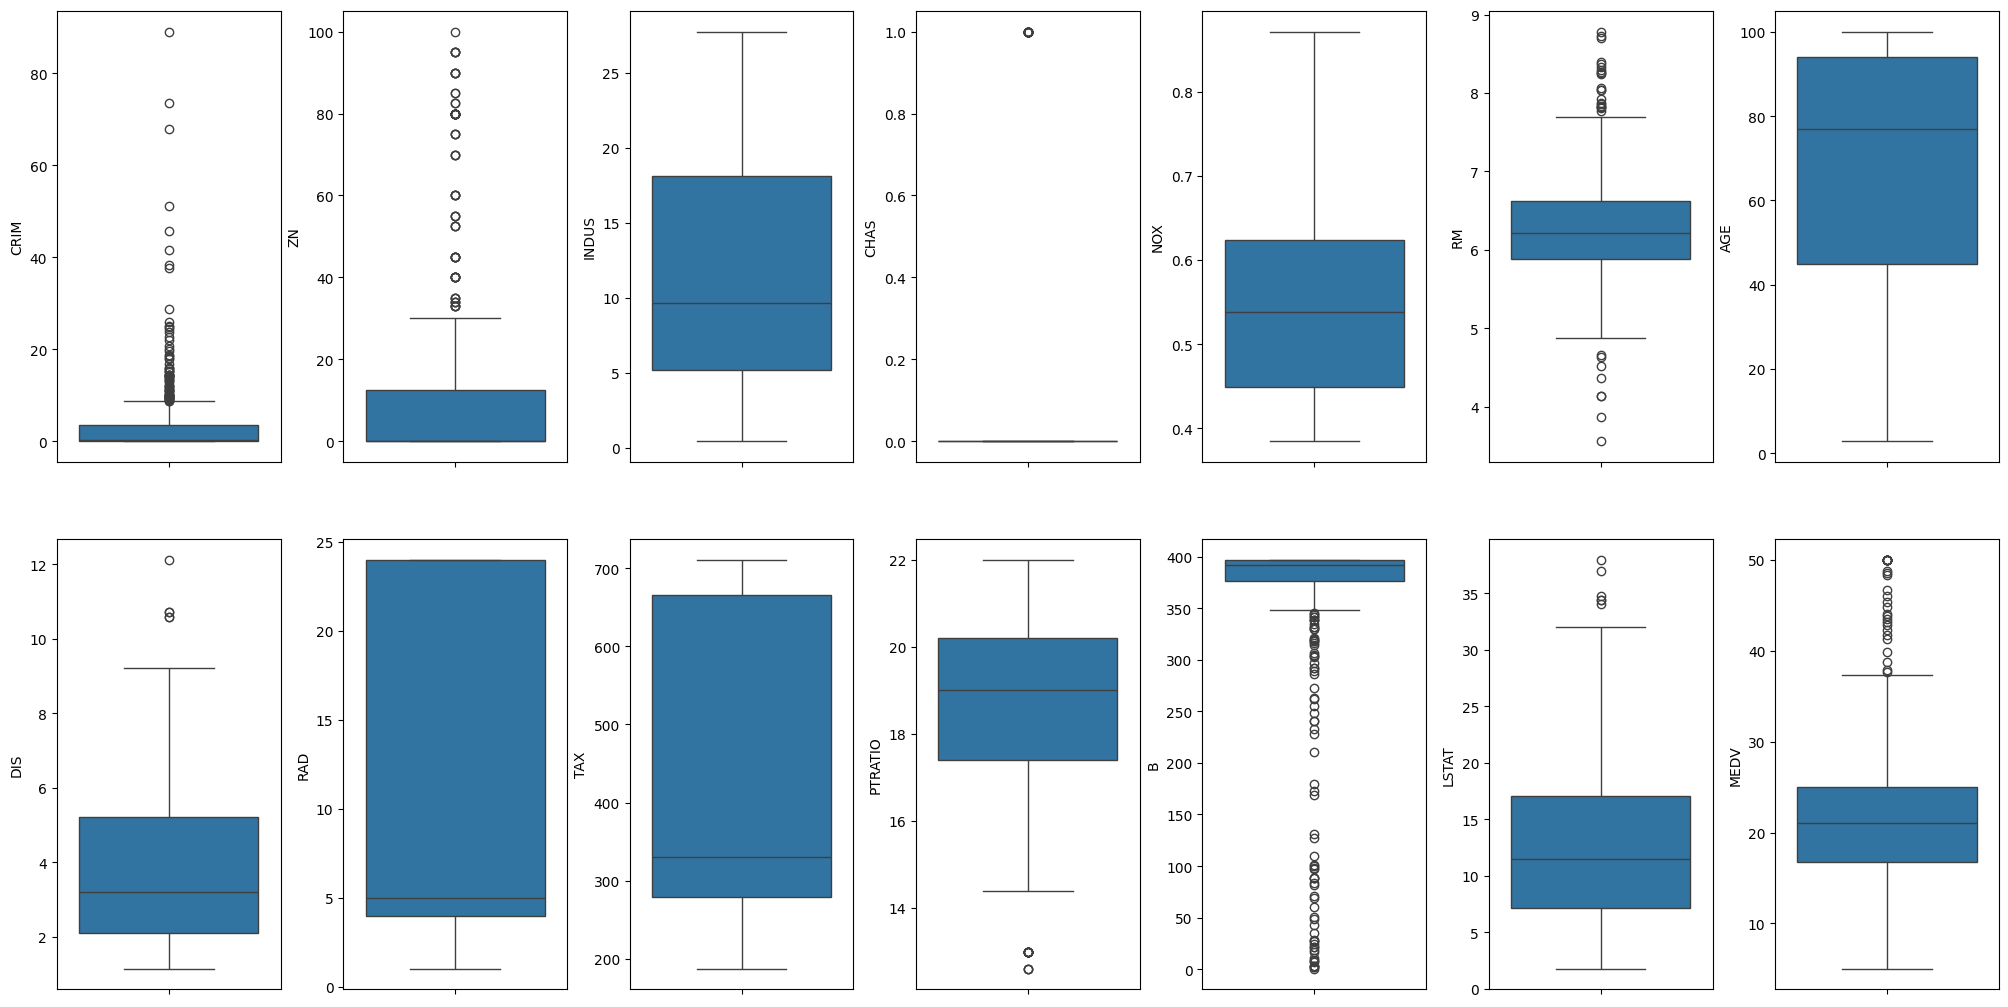

In [36]:
from scipy import stats
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in ds.items():
    sns.boxplot(y=k, data=ds, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [37]:
ds = ds.drop(['CHAS', 'RAD', 'B', 'LSTAT'], axis=1)

In [38]:
ds

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,22.0


In [39]:
x = ds.drop('MEDV', axis=1)
y = ds['MEDV']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)

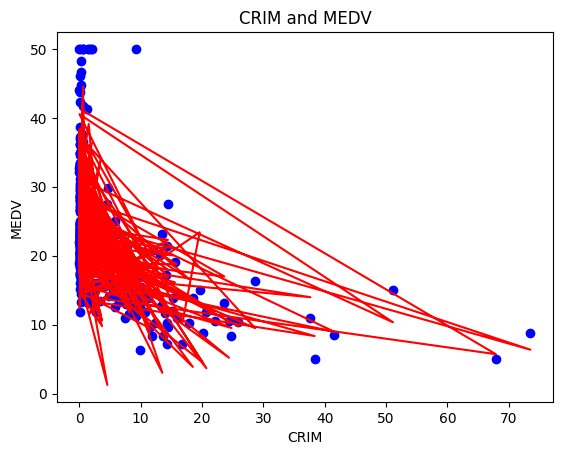

In [42]:
plt.scatter(x_train['CRIM'], y_train, color='blue')
plt.plot(x_train['CRIM'], model.predict(x_train), color='red') # Ensure model.predict is compatible
plt.xlabel("CRIM")  # Add label for x-axis
plt.ylabel("MEDV")  # Add label for y-axis
plt.title("CRIM and MEDV")  # Add title to the plot
plt.show()

In [43]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.72


In [44]:
from sklearn.preprocessing import PolynomialFeatures

model = PolynomialFeatures(degree=2)
x_poly_train = model.fit_transform(x_train)
x_poly_test = model.transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)

pred = poly_reg.predict(x_poly_test)

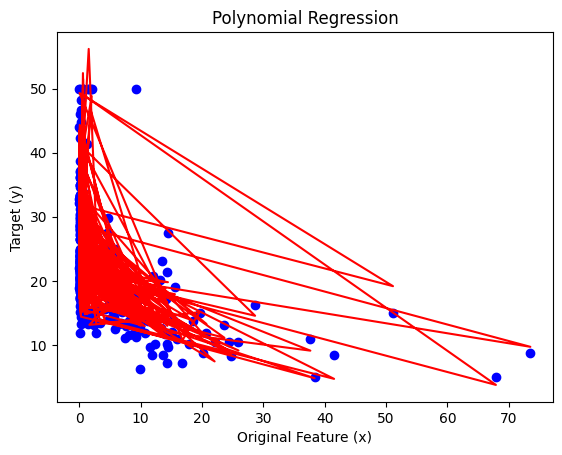

In [45]:
pred_train = poly_reg.predict(x_poly_train)

# Now plot with x_poly_train and pred_train, which should have the same size
plt.scatter(x_poly_train[:, 1], y_train, color='blue')  # Use the original feature for scatter plot
plt.plot(x_poly_train[:, 1], pred_train, color='red') # Use the original feature for line plot

plt.xlabel("Original Feature (x)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression")
plt.show()

In [46]:
x_poly = model.transform(x)  # Transform 'x' using the same PolynomialFeatures

r_squared = round(poly_reg.score(x_poly, y), 3)
print(f'R-squared: {r_squared}')

R-squared: 0.859


In [47]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.5)  # Adjust alpha as needed
model.fit(x_train, y_train)

pred = model.predict(x_test)

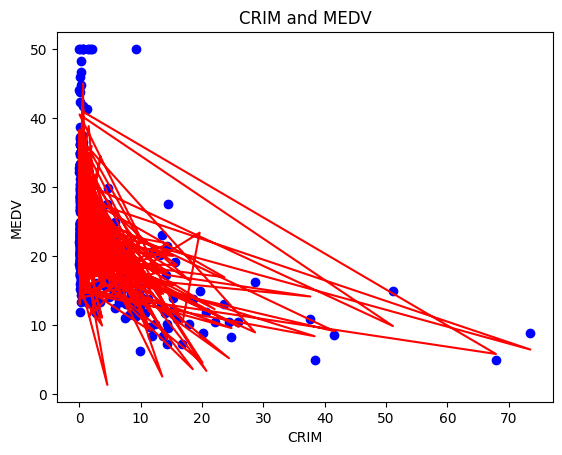

In [48]:
plt.scatter(x_train['CRIM'], y_train, color='blue')
plt.plot(x_train['CRIM'], model.predict(x_train), color='red') # Ensure model.predict is compatible
plt.xlabel("CRIM")  # Add label for x-axis
plt.ylabel("MEDV")  # Add label for y-axis
plt.title("CRIM and MEDV")  # Add title to the plot
plt.show()

In [49]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.72


In [50]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Adjust alpha as needed
model.fit(x_train, y_train)

# Predictions and evaluation
pred = model.predict(x_test)

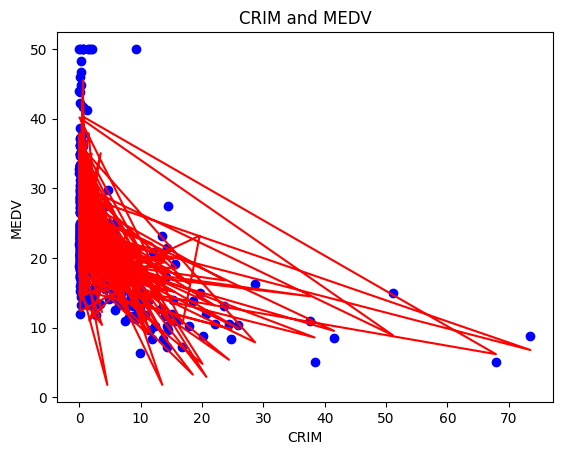

In [51]:
plt.scatter(x_train['CRIM'], y_train, color='blue')
plt.plot(x_train['CRIM'], model.predict(x_train), color='red') # Ensure model.predict is compatible
plt.xlabel("CRIM")  # Add label for x-axis
plt.ylabel("MEDV")  # Add label for y-axis
plt.title("CRIM and MEDV")  # Add title to the plot
plt.show()

In [52]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.71


In [53]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict

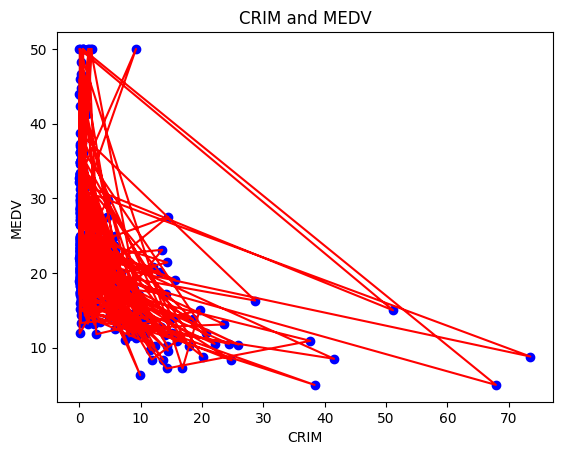

In [54]:
plt.scatter(x_train['CRIM'], y_train, color='blue')
plt.plot(x_train['CRIM'], model.predict(x_train), color='red') # Ensure model.predict is compatible
plt.xlabel("CRIM")  # Add label for x-axis
plt.ylabel("MEDV")  # Add label for y-axis
plt.title("CRIM and MEDV")  # Add title to the plot
plt.show()

In [55]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.941


In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict

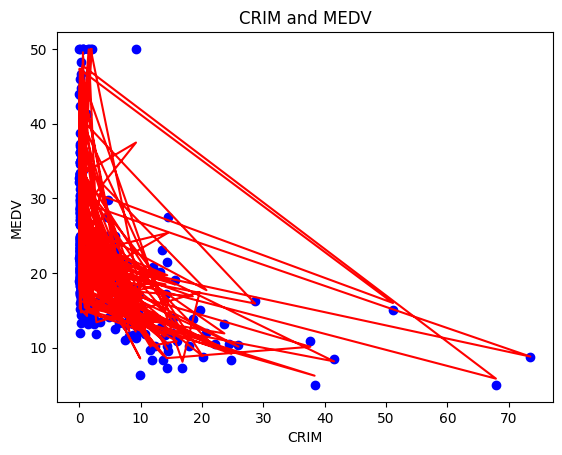

In [57]:
plt.scatter(x_train['CRIM'], y_train, color='blue')
plt.plot(x_train['CRIM'], model.predict(x_train), color='red') # Ensure model.predict is compatible
plt.xlabel("CRIM")  # Add label for x-axis
plt.ylabel("MEDV")  # Add label for y-axis
plt.title("CRIM and MEDV")  # Add title to the plot
plt.show()

In [58]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.945


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)
pred = model.predict

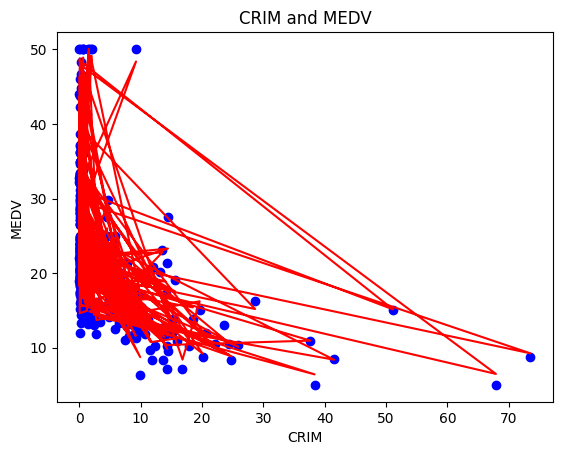

In [60]:
plt.scatter(x_train['CRIM'], y_train, color='blue')
plt.plot(x_train['CRIM'], model.predict(x_train), color='red') # Ensure model.predict is compatible
plt.xlabel("CRIM")  # Add label for x-axis
plt.ylabel("MEDV")  # Add label for y-axis
plt.title("CRIM and MEDV")  # Add title to the plot
plt.show()

In [61]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.941
